In [1]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading dataset

data = pd.read_csv('Add_sales_data_2018.csv')
data.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [3]:
# checking info ()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [4]:
# checking for null values

data.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

No null values in given dataset

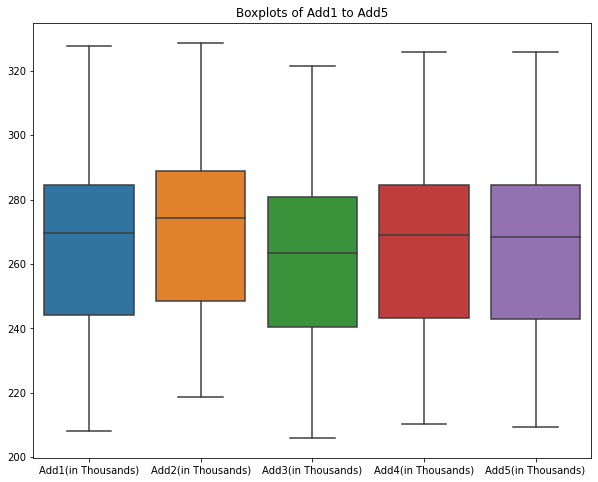

In [5]:
# checking for outliers

plt.figure(figsize=(10,8))
sns.boxplot(data=data.drop(['Profit(in Thousands)'], axis=1))
plt.title('Boxplots of Add1 to Add5')
plt.show()

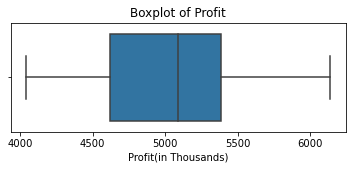

In [6]:
plt.figure(figsize=(6,2))
sns.boxplot(x=data['Profit(in Thousands)'])
plt.title('Boxplot of Profit')
plt.show()

No outliers in given dataset

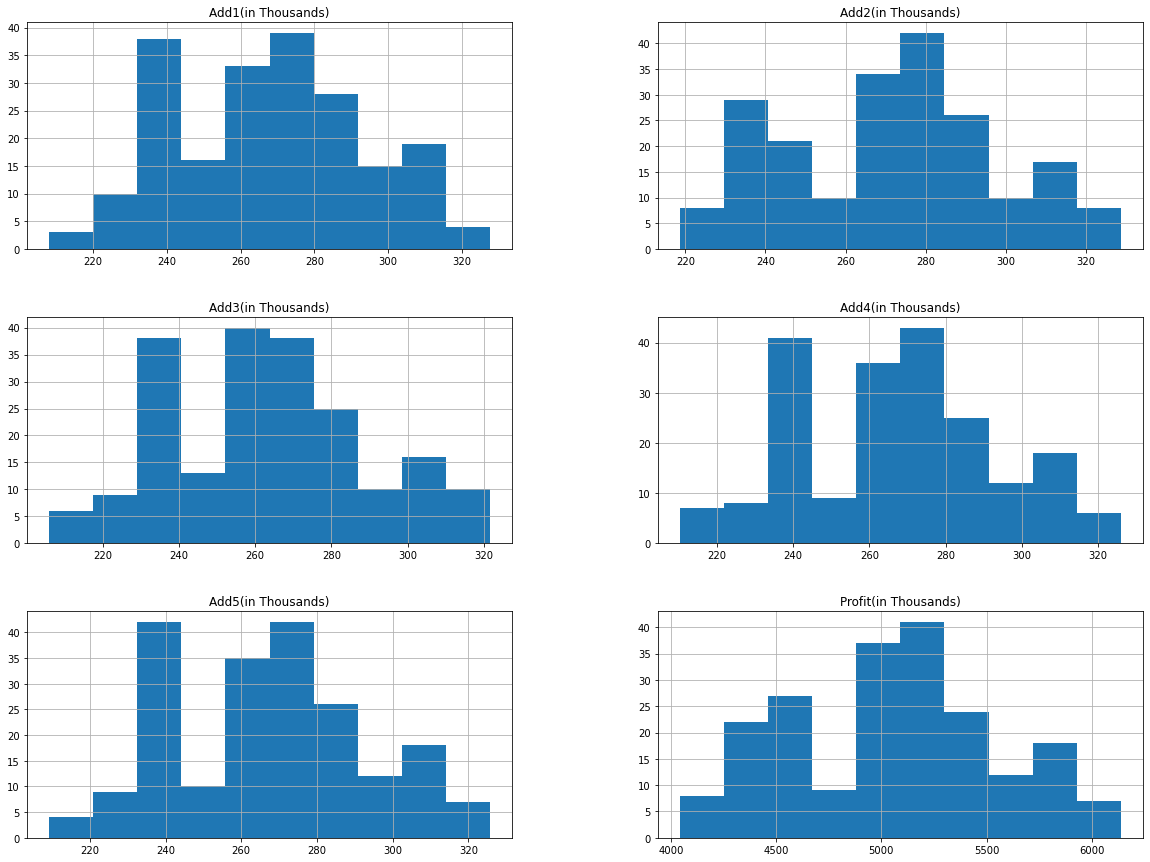

In [7]:
# checking the distribution

fqg = data.select_dtypes(include=['float64'])
fqg.hist(figsize=(20,15))
plt.show()

In [8]:
#checking statistics of data

data.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


In [9]:
#checking number of unique values in "Profit(in Thousands)" column

data['Profit(in Thousands)'].nunique()

205

All values in target column are unique

# 1. Correlation Analysis

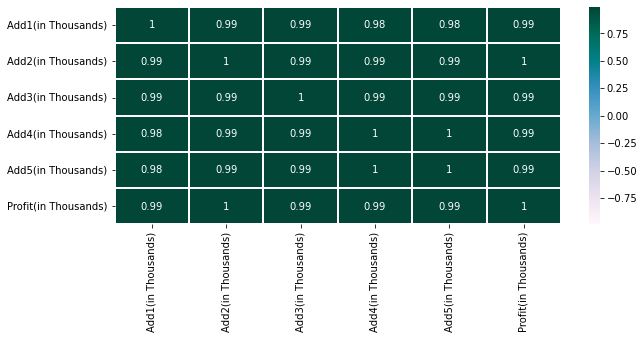

In [10]:
corr = data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(data=corr, vmin=-0.99, vmax=0.99, annot=True, linewidth=0.2, cmap='PuBuGn')
plt.show()

The amount spent for advertising through all five different companies and profit generated shows a very high positive correlation. Add2 and Profit are having maximum positive correlation.

Add4 and Add5 columns are having maximum positive correlation.

# 2. Regression model to predict profit

In [11]:
d1 = data.copy()  #copyong dataset to another variable 

In [12]:
# splitting the daset to train and test

y1 = d1['Profit(in Thousands)']
X1 = d1.drop(['Date', 'Profit(in Thousands)'], axis=1)

In [13]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test = train_test_split(X1, y1, random_state=42, test_size=0.25)

In [14]:
# building regression_model

from sklearn import linear_model
lr = linear_model.LinearRegression() 

model1 = lr.fit(X1_train, y1_train)

In [15]:
# to get the values predictions for values in X1_test

predictions1 = model1.predict(X1_test)

In [16]:
# to compare predicted andf actual values

pd.DataFrame({'orginal y1_value': y1_test,
              'predicted y1_value': predictions1})

,orginal y1_value,predicted y1_value
15,4152.066,4152.066
9,4446.441,4446.441
100,5131.898,5131.898
132,4907.560,4907.560
68,5004.282,5004.282
95,4623.793,4623.793
159,5384.175,5384.175
162,5328.025,5328.025
147,5175.051,5175.051
182,5956.323,5956.323


In [17]:
# determining MSE

from sklearn.metrics import mean_squared_error as mse
print('MSE is: ', mse(y1_test, predictions1))

MSE is:  8.11273293080854e-25


MSE of Model_1 is very low and hence Model_1 is acceptable

# 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement

Add1(in Thousands)   290

Add2(in Thousands)   312

Add3(in Thousands)   309

Add4(in Thousands)   298

Add5(in Thousands)   320

In [20]:
X1_new = pd.DataFrame({'Add1(in Thousands)':[290],
                       'Add2(in Thousands)':[312],
                       'Add3(in Thousands)':[309],
                       'Add4(in Thousands)':[298],
                       'Add5(in Thousands)':[320]})
predictions2_new = model1.predict(X1_new)
X1_new['Profit(in Thousands)']=predictions2_new
X1_new

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,290,312,309,298,320,5820.06
